# Turkey Earthquake 

## Project 1 Team 2
Cecilia Lizcano, 
Omar Alejandro Vallejo, 
Erica Alvarez, 
Roberto Rodas, 
Alvaro Corona

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame
import hvplot.pandas
import requests

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
file = Path("../Resources/TurkeyEarthquakes_2008_2023.csv")

In [4]:
original_df = pd.read_csv(file)
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             7770 non-null   object 
 1   latitude         7770 non-null   float64
 2   longitude        7770 non-null   float64
 3   depth            7770 non-null   float64
 4   mag              7770 non-null   float64
 5   magType          7770 non-null   object 
 6   nst              3718 non-null   float64
 7   gap              7139 non-null   float64
 8   dmin             4421 non-null   float64
 9   rms              5688 non-null   float64
 10  net              7770 non-null   object 
 11  id               7770 non-null   object 
 12  updated          7770 non-null   object 
 13  place            7724 non-null   object 
 14  type             7770 non-null   object 
 15  horizontalError  4567 non-null   float64
 16  depthError       5406 non-null   float64
 17  magError      

In [5]:
original_df.columns

Index(['time', 'latitude', 'longitude', 'depth', 'mag', 'magType', 'nst',
       'gap', 'dmin', 'rms', 'net', 'id', 'updated', 'place', 'type',
       'horizontalError', 'depthError', 'magError', 'magNst', 'status',
       'locationSource', 'magSource'],
      dtype='object')

In [6]:
df = original_df[['time', 'latitude', 'longitude', 'depth', 
                  'mag', 'magType', 'net', 'id', 'updated',
                  'type', 'status','locationSource', 'magSource']].copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7770 entries, 0 to 7769
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   time            7770 non-null   object 
 1   latitude        7770 non-null   float64
 2   longitude       7770 non-null   float64
 3   depth           7770 non-null   float64
 4   mag             7770 non-null   float64
 5   magType         7770 non-null   object 
 6   net             7770 non-null   object 
 7   id              7770 non-null   object 
 8   updated         7770 non-null   object 
 9   type            7770 non-null   object 
 10  status          7770 non-null   object 
 11  locationSource  7770 non-null   object 
 12  magSource       7770 non-null   object 
dtypes: float64(4), object(9)
memory usage: 789.3+ KB


In [7]:
df.head()

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource
0,2023-07-19T14:14:47.038Z,36.4116,53.9089,10.000,4.3,mb,us,us7000kgw7,2023-07-19T20:19:41.040Z,earthquake,reviewed,us,us
1,2023-07-18T20:30:55.209Z,45.0385,23.0251,12.806,4.0,mb,us,us7000kgn3,2023-07-19T04:47:16.666Z,earthquake,reviewed,us,us
2,2023-07-17T12:04:26.739Z,36.5808,23.0401,70.563,4.2,mb,us,us7000kgby,2023-07-17T12:24:40.040Z,earthquake,reviewed,us,us
3,2023-07-11T09:52:19.105Z,39.3973,26.2615,10.000,3.4,ml,us,us7000ketw,2023-07-11T13:19:44.229Z,earthquake,reviewed,us,us
4,2023-07-09T02:27:36.163Z,38.0000,36.3643,5.736,3.5,ml,us,us6000kr1s,2023-07-10T02:41:16.388Z,earthquake,reviewed,us,us


In [8]:
df['year'] = pd.DatetimeIndex(df['time']).year
df['month'] = pd.DatetimeIndex(df['time']).month

In [9]:
df.head()

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,year,month
0,2023-07-19T14:14:47.038Z,36.4116,53.9089,10.000,4.3,mb,us,us7000kgw7,2023-07-19T20:19:41.040Z,earthquake,reviewed,us,us,2023,7
1,2023-07-18T20:30:55.209Z,45.0385,23.0251,12.806,4.0,mb,us,us7000kgn3,2023-07-19T04:47:16.666Z,earthquake,reviewed,us,us,2023,7
2,2023-07-17T12:04:26.739Z,36.5808,23.0401,70.563,4.2,mb,us,us7000kgby,2023-07-17T12:24:40.040Z,earthquake,reviewed,us,us,2023,7
3,2023-07-11T09:52:19.105Z,39.3973,26.2615,10.000,3.4,ml,us,us7000ketw,2023-07-11T13:19:44.229Z,earthquake,reviewed,us,us,2023,7
4,2023-07-09T02:27:36.163Z,38.0000,36.3643,5.736,3.5,ml,us,us6000kr1s,2023-07-10T02:41:16.388Z,earthquake,reviewed,us,us,2023,7


In [10]:
df['type'].unique()

array(['earthquake', 'explosion'], dtype=object)

## EDA Questions 

### 1. What was the date and time of the most disastrous earthquake recorded in Turkey according to the dataset?


In [11]:
df_increase = df.copy()
df_increase.sort_values(by='mag', ascending=False, inplace=True)
df_disastrous = df_increase.head(5)
df_disastrous 

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,year,month
709,2023-02-06T01:17:34.342Z,37.2256,37.0143,10.000,7.8,mww,us,us6000jllz,2023-07-19T08:32:38.718Z,earthquake,reviewed,us,us,2023,2
605,2023-02-06T10:24:48.811Z,38.0106,37.1962,7.432,7.5,mww,us,us6000jlqa,2023-06-17T18:00:10.939Z,earthquake,reviewed,us,us,2023,2
3382,2017-11-12T18:18:17.180Z,34.9109,45.9592,19.000,7.3,mww,us,us2000bmcg,2022-05-03T20:02:36.492Z,earthquake,reviewed,us,us,2017,11
5871,2011-10-23T10:41:23.250Z,38.7210,43.5080,18.000,7.1,mww,us,usp000j9rr,2022-04-08T22:08:47.620Z,earthquake,reviewed,us,us,2011,10
1734,2020-10-30T11:51:27.348Z,37.8973,26.7838,21.000,7.0,mww,us,us7000c7y0,2023-03-28T14:51:23.263Z,earthquake,reviewed,us,us,2020,10


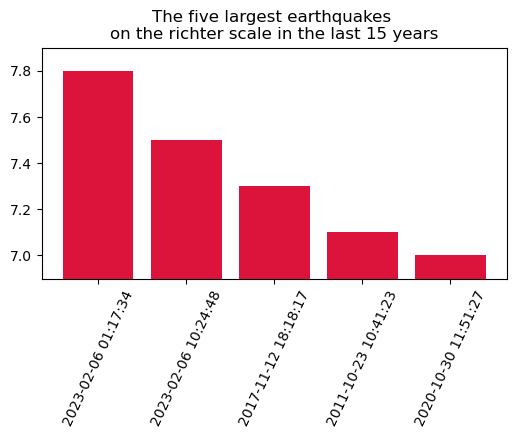

In [12]:
x= pd.to_datetime(df_disastrous['time'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.strftime('%Y-%m-%d %H:%M:%S')
y= df_disastrous['mag']
plt.figure(figsize=(6, 3))
plt.bar(x, y, color='crimson')
plt.xticks(rotation = 65)
plt.title('The five largest earthquakes \non the richter scale in the last 15 years')
#
plt.ylim(6.9, 7.9)
plt.show()

### 2. During what period of time did the seismic activity increase in turkey?

In [13]:
df_time_range = df.copy()
df_time_range = df_time_range.query("'2022-02-23' < time <= '2023-06-24'")
df_increase = df_time_range.copy()
df_time_range = df_time_range.query("mag >= 5")
df_time_range.sort_values(by=['time'], ascending=True, inplace=True)

In [14]:
bins = [0, 5.0, 6.0, 7.0, 10.0]
labels = ['palegreen', 'gold', 'darkorange', 'crimson']
df_time_range['color'] = pd.cut(df['mag'], bins=bins, labels=labels)
df_time_range.head()

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,year,month,color
1015,2022-04-09T14:02:15.496Z,38.1155,38.6617,10.000,5.3,mww,us,us7000h0wh,2022-06-20T22:07:34.040Z,earthquake,reviewed,us,us,2022,4,gold
943,2022-06-10T01:40:21.404Z,34.8354,33.8695,47.150,5.0,mww,us,us7000hgcl,2022-08-13T21:52:43.040Z,earthquake,reviewed,us,us,2022,6,palegreen
939,2022-06-12T18:35:20.871Z,38.7366,43.5068,10.000,5.2,mww,us,us7000hgyu,2022-08-21T00:16:32.040Z,earthquake,reviewed,us,us,2022,6,gold
890,2022-08-14T03:24:22.958Z,37.9952,27.1512,11.697,5.0,mww,us,us6000ianw,2022-10-28T02:25:49.040Z,earthquake,reviewed,us,us,2022,8,palegreen
875,2022-08-31T10:10:11.426Z,37.5527,26.8515,10.926,5.4,mww,us,us7000i3yp,2022-11-06T04:36:59.040Z,earthquake,reviewed,us,us,2022,8,gold


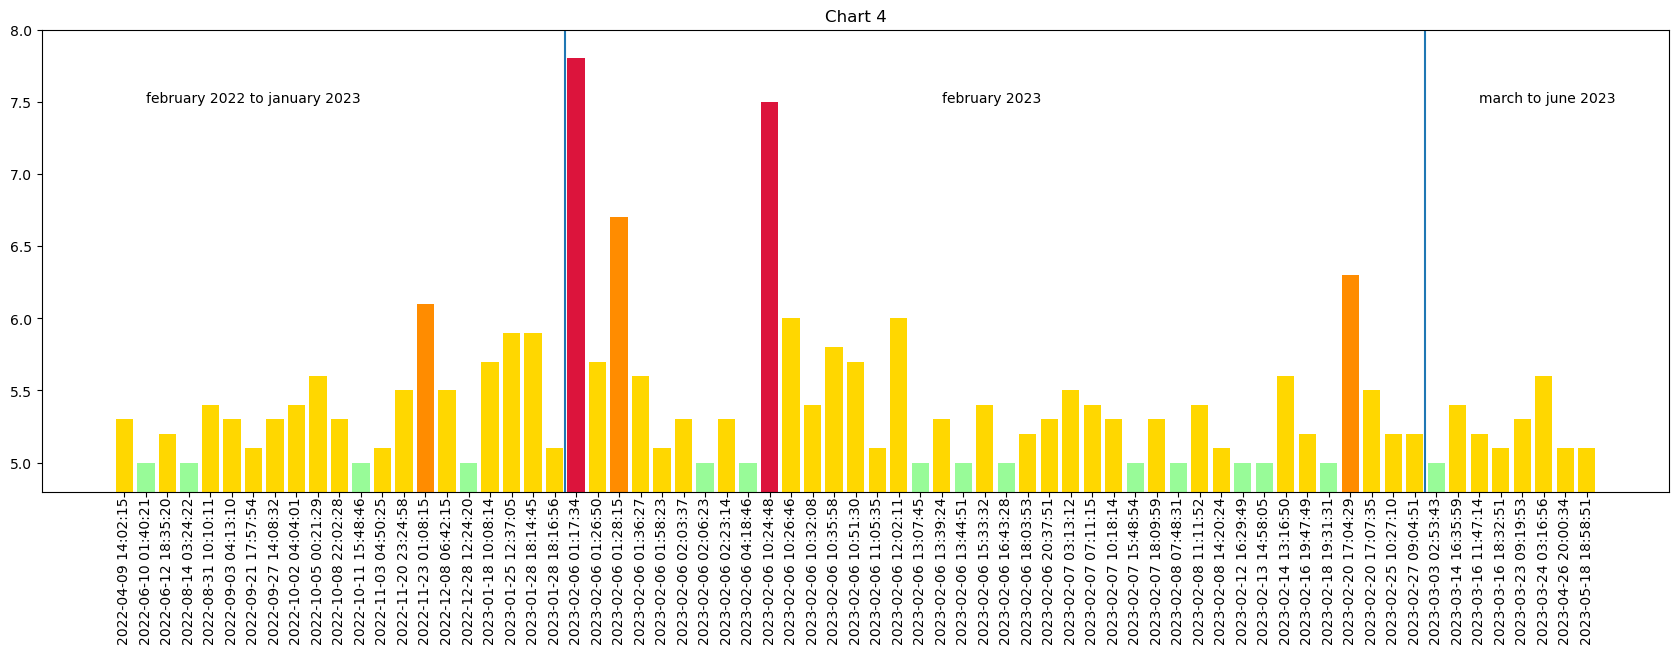

In [15]:
x= pd.to_datetime(df_time_range['time'], format='%Y-%m-%dT%H:%M:%S.%fZ').dt.strftime('%Y-%m-%d %H:%M:%S')
y= df_time_range['mag']
plt.figure(figsize=(21, 6))
plt.xticks(rotation = 90)
#plt.xticks([])
plt.axvline(x=20.5)
plt.axvline(x=60.5)
plt.title('Chart 4')
plt.text(1, 7.5, 'february 2022 to january 2023')
plt.text(38, 7.5, 'february 2023')
plt.text(63, 7.5, 'march to june 2023')
plt.tick_params(axis='x', pad=0)
plt.ylim(4.8, 8)
plt.bar(x, y, color=df_time_range['color'])
plt.show()

In [16]:
df_disastrous_copy = df.copy()
df_disastrous_copy = df_disastrous_copy.query("mag >= 5")
df_disastrous_copy['year'] = df_disastrous_copy['year'].astype(str)
df_disastrous_copy['month'] = df_disastrous_copy['month'].astype(str)
df_disastrous_copy['year_month'] = df_disastrous_copy['year'] +'-'+ df_disastrous_copy['month']
df_disastrous_copy = df_disastrous_copy.query("'2021-06-24' < time <= '2023-06-24'")


In [17]:
grouped = df_disastrous_copy.groupby(['year_month']).size().reset_index(name='count')
grouped['sort']=[5,6,7,1,2,3,4,8,13,14,15,9,10,11,12,16,17,18,19,20,21]
grouped.sort_values(by='sort', ascending=True, inplace=True)

In [18]:
bins = [0, 2, 10, 100]
labels = ['gold', 'darkorange', 'crimson']
grouped['color'] = pd.cut(grouped['count'], bins=bins, labels=labels)

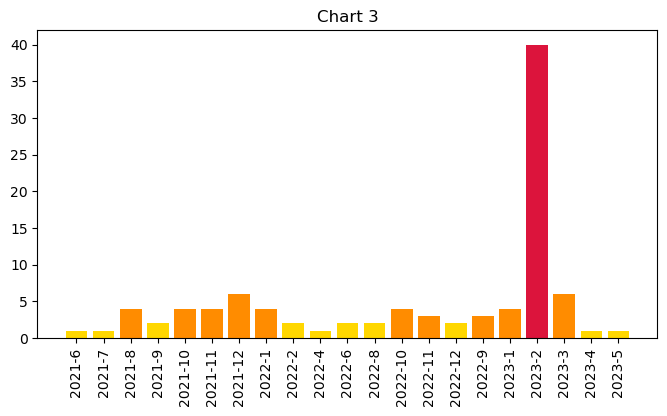

In [19]:
x= grouped['year_month']
y= grouped['count']
plt.figure(figsize=(8, 4))
#plt.title('EarthQuake amount per month from june 2021 to june 2023 \n greater than 5 on richter scale')
plt.title('Chart 3')
plt.xticks(rotation = 90)
plt.bar(x, y, color=grouped['color'])
plt.show()

In [20]:
grouped2 = df_disastrous_copy.groupby(['year_month'])['mag'].max().reset_index() 

bins = [0, 5.0, 6.0, 7.0, 10.0]
labels = ['palegreen', 'gold', 'darkorange', 'crimson']
grouped2['color'] = pd.cut(grouped2['mag'], bins=bins, labels=labels)

grouped2['sort']=[5,6,7,1,2,3,4,8,14,15,16,9,10,11,12,13,17,18,19,20,21]
grouped2.sort_values(by='sort', ascending=True, inplace=True)


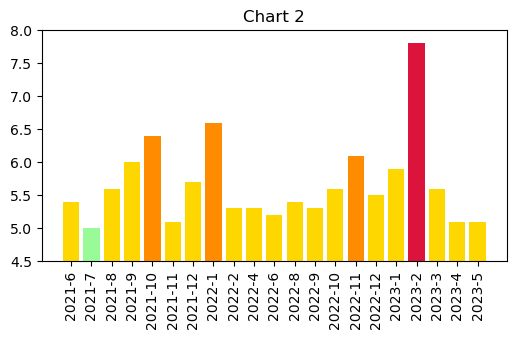

In [21]:
x= grouped2['year_month']
y= grouped2['mag']
plt.figure(figsize=(6, 3))
#plt.title('The greatest Earthquakes per month from june 2021 to june 2023 \n greater than 5 on richter scale')
plt.title('Chart 2')
plt.xticks(rotation = 90)
plt.ylim(4.5, 8)
plt.bar(x, y, color=grouped2['color'])
plt.show()

### 3. What was the magnitude of the most devastating earthquake in Turkey's history according to the dataset?

In [22]:
df_increase = df.copy()
df_increase.sort_values(by='mag', ascending=False, inplace=True)
df_disastrous3 = df_increase.head(1)
df_disastrous3 

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,year,month
709,2023-02-06T01:17:34.342Z,37.2256,37.0143,10.0,7.8,mww,us,us6000jllz,2023-07-19T08:32:38.718Z,earthquake,reviewed,us,us,2023,2


In [23]:
dato_mas_grande = 7.8
column_to_check = 'mag'
x= df[column_to_check].max()
indice_dato_mas_grande = df[df[column_to_check] == dato_mas_grande].index[0]
y = df.at[indice_dato_mas_grande, 'time']
z=df.at[indice_dato_mas_grande, 'type']
w=df.at[indice_dato_mas_grande, 'depth']
print(f'The strongest magnitude is {x} the date {y} at the depth of {w}. \nWhich is considered the most powerful {z}?  \nThat has occurred in the selected country in relation to the database')

The strongest magnitude is 7.8 the date 2023-02-06T01:17:34.342Z at the depth of 10.0. 
Which is considered the most powerful earthquake?  
That has occurred in the selected country in relation to the database


### 4. In which specific region of Turkey did the most destructive earthquake recorded in the dataset occur?

In [24]:
df_max_region=df.copy()
df_max_region = df_max_region.query("mag >= 5")
df_max_region.sort_values(by='mag', ascending=False, inplace=True)
df_max_region = df_max_region.head(50)

grouped = df_max_region.groupby(['mag', 'id', 'latitude', 'longitude']).size().reset_index(name='count')
grouped = grouped.sort_values(by='mag', ascending=False)

In [25]:
Max_region=grouped.loc[grouped['id'] == 'us6000jllz']
Max_region

,mag,id,latitude,longitude,count
49,7.8,us6000jllz,37.2256,37.0143,1


In [26]:
geometry = [Point(xy) for xy in zip(Max_region['longitude'], Max_region['latitude'])]
gdf= GeoDataFrame(Max_region, geometry=geometry)

Text(0.5, 1.0, 'Map 1')

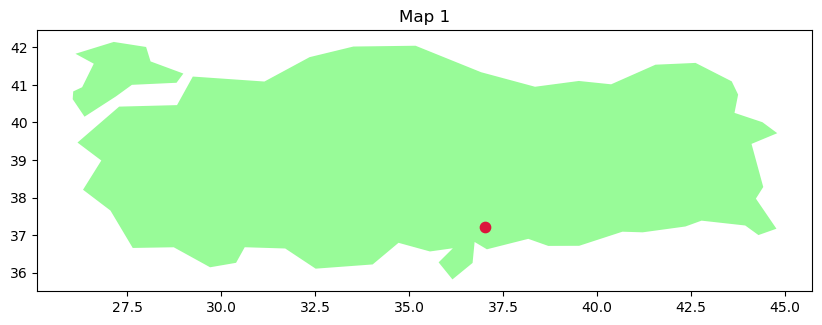

In [27]:
world_filepath = gpd.datasets.get_path('naturalearth_lowres')
world = gpd.read_file(world_filepath)
world.head()
turkey = world.loc[world['name'] == 'Turkey'] # get Turkey row
map_1 = gdf.plot(ax=turkey.plot(figsize=(10, 6), color='palegreen'), marker='o', color='crimson', markersize=55)
map_1.set_title('Map 1')

### 5. What was the depth of the epicenter of the most devastating earthquake recorded in Turkey, according to the dataset?

### 6. Which were the main cities or localities affected by the most catastrophic earthquake in Turkey according to the dataset?

In [28]:
df_disastrous["size"]=df_disastrous["mag"] ** 2.3
df_disastrous.head(5)

,time,latitude,longitude,depth,mag,magType,net,id,updated,type,status,locationSource,magSource,year,month,size
709,2023-02-06T01:17:34.342Z,37.2256,37.0143,10.000,7.8,mww,us,us6000jllz,2023-07-19T08:32:38.718Z,earthquake,reviewed,us,us,2023,2,112.672411
605,2023-02-06T10:24:48.811Z,38.0106,37.1962,7.432,7.5,mww,us,us6000jlqa,2023-06-17T18:00:10.939Z,earthquake,reviewed,us,us,2023,2,102.953450
3382,2017-11-12T18:18:17.180Z,34.9109,45.9592,19.000,7.3,mww,us,us2000bmcg,2022-05-03T20:02:36.492Z,earthquake,reviewed,us,us,2017,11,96.748130
5871,2011-10-23T10:41:23.250Z,38.7210,43.5080,18.000,7.1,mww,us,usp000j9rr,2022-04-08T22:08:47.620Z,earthquake,reviewed,us,us,2011,10,90.759940
1734,2020-10-30T11:51:27.348Z,37.8973,26.7838,21.000,7.0,mww,us,us7000c7y0,2023-03-28T14:51:23.263Z,earthquake,reviewed,us,us,2020,10,87.846708


In [29]:
df_dis=df_disastrous.head(5)

In [31]:
Apikey="6ba5d1a969e64287a72cb371a742eea1"
def get_city_name(latitude, longitude):
    url = f'https://api.geoapify.com/v1/geocode/reverse?lat={latitude}&lon={longitude}&apiKey={Apikey}'
    response = requests.get(url)
    data = response.json()
    city = data['features'][0]['properties'].get('city')
    if not city:
        city = data['features'][0]['properties'].get('village')
    return city


df_dis['city'] = df_dis.apply(lambda row: get_city_name(row['latitude'], row['longitude']), axis=1)

plot = df_dis.hvplot.points(x='longitude', y='latitude', geo=True, alpha=1, size="size",
                            hover_cols=['city','mag'], title='Map 2', 
                            tiles='OSM', color="crimson", frame_width=1200, frame_height=600)
plot

:Overlay
   .Tiles.I  :Tiles   [x,y]
   .Points.I :Points   [longitude,latitude]   (size,city,mag)